In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [16]:
# Read the CSV file with proper data type handling
video1 = pd.read_csv('examples_interactions_pietons/trot1.csv', sep=';')


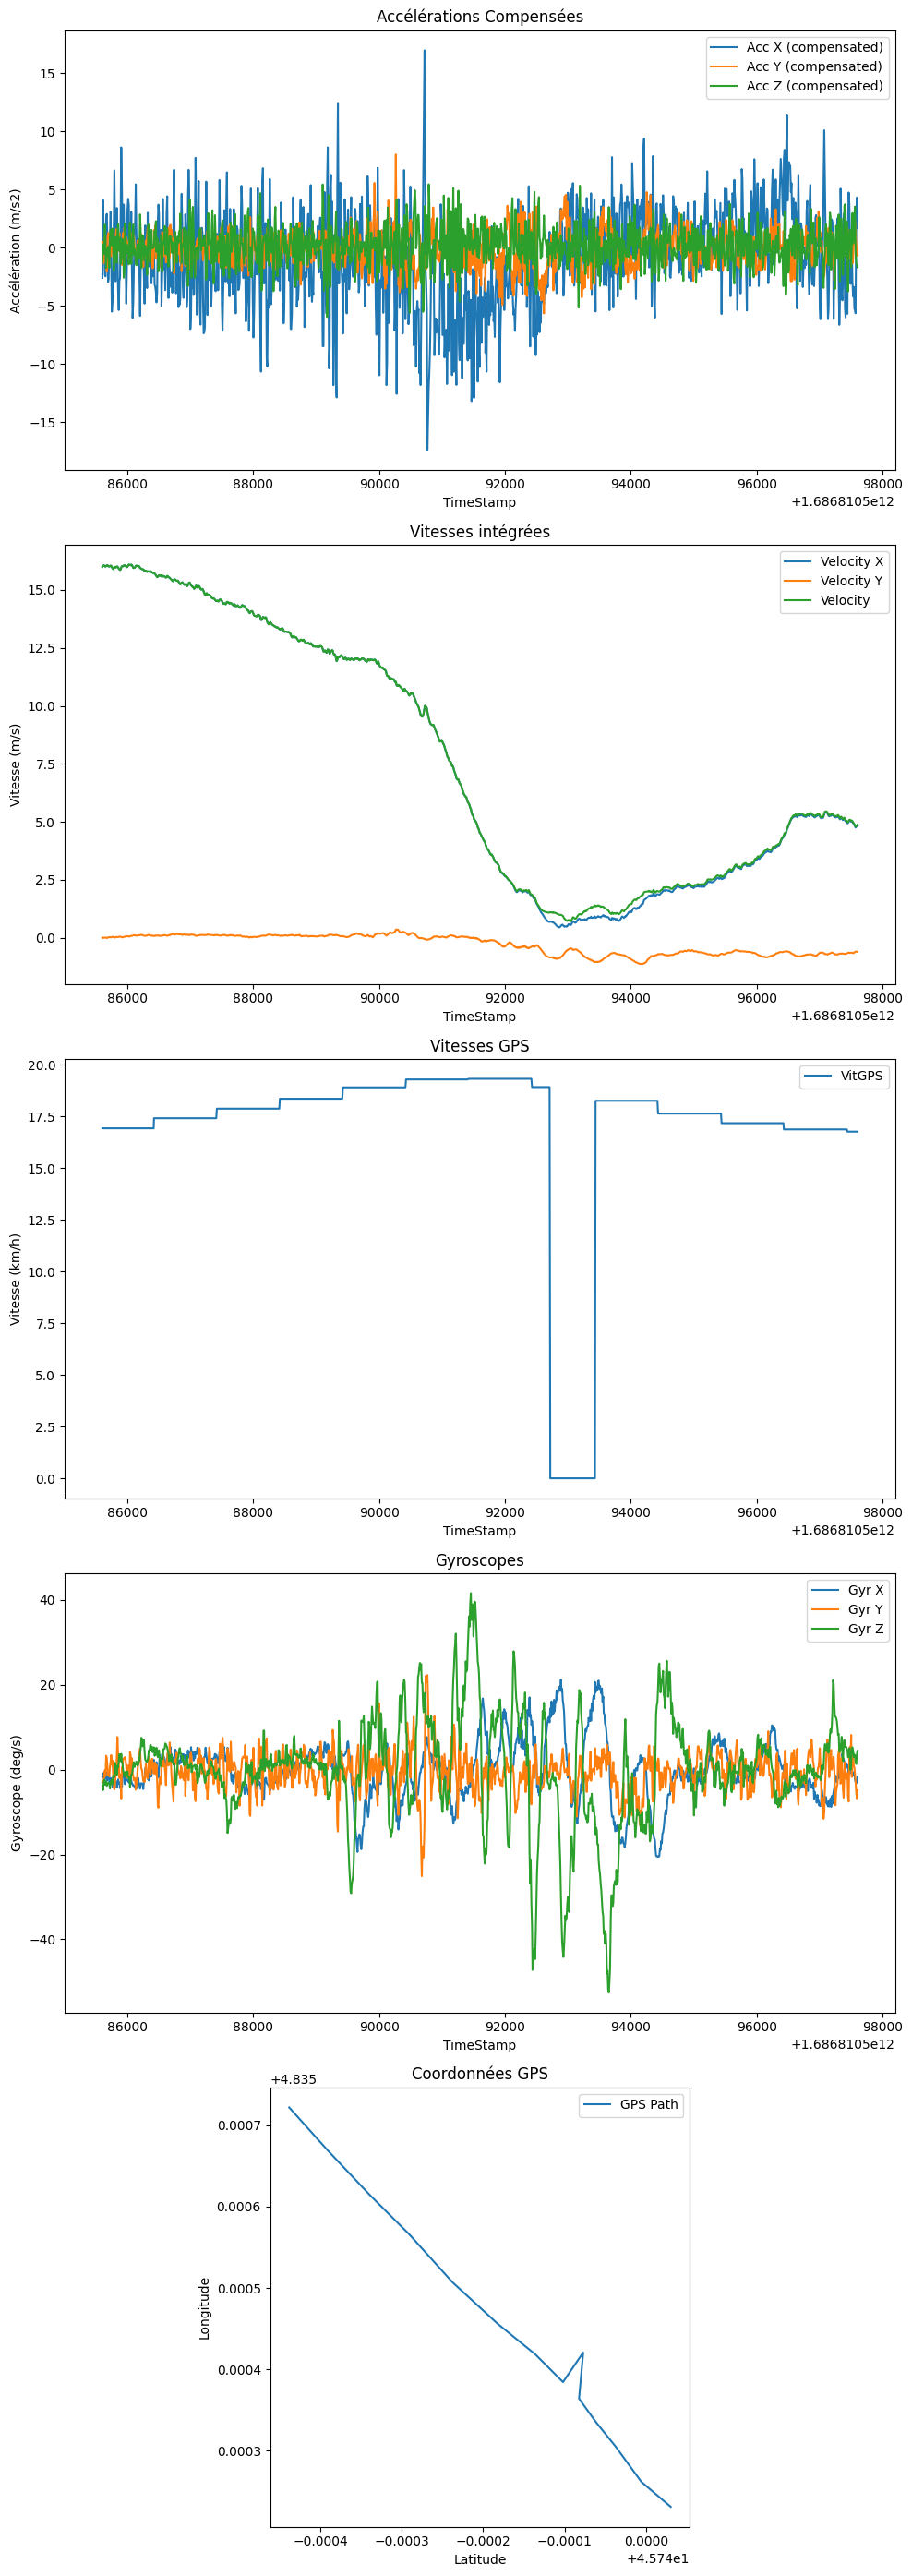

In [68]:

# Calculer la différence de temps entre chaque point de données en secondes
time_diff = np.diff(video1['TimeStamp'], prepend=video1['TimeStamp'].iloc[0]) / 1000.0

# Compensez les effets de la gravité sur les mesures d'accélération
acc_x = video1[' AccX(g)']*9.81 -video1[' gravX']
acc_y = video1[' AccY(g)']*9.81 -video1[' gravY'] 
acc_z = video1[' AccZ(g)']*9.81 -video1[' gravZ']

# Intégrer les données d'accélération pour obtenir la vitesse
velocity_x = np.cumsum(acc_x  * time_diff)+ video1[' VitGPS(km/h)'].iloc[200] / 3.6
velocity_y = np.cumsum(acc_y  * time_diff)
velocity_z = np.cumsum(acc_z  * time_diff)

velocity = np.sqrt(velocity_x**2 + velocity_y**2)



# Intégrer les vitesses pour obtenir les positions
position_x = np.cumsum(velocity_x * time_diff)
position_y = np.cumsum(velocity_y * time_diff)
position_z = np.cumsum(velocity_z * time_diff)

# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(5, 1, figsize=(10, 28))
# Plot des accélérations compensées
axs[0].plot(video1['TimeStamp'], acc_x, label='Acc X (compensated)')
axs[0].plot(video1['TimeStamp'], acc_y, label='Acc Y (compensated)')
axs[0].plot(video1['TimeStamp'], acc_z, label='Acc Z (compensated)')
axs[0].set_title('Accélérations Compensées')
axs[0].set_xlabel('TimeStamp')
axs[0].set_ylabel('Accélération (m/s2)')
axs[0].legend()

# Plot des vitesses intégrées
axs[1].plot(video1['TimeStamp'], velocity_x, label='Velocity X')
axs[1].plot(video1['TimeStamp'], velocity_y, label='Velocity Y')
axs[1].plot(video1['TimeStamp'], velocity, label='Velocity')

axs[1].set_title('Vitesses intégrées')
axs[1].set_xlabel('TimeStamp')
axs[1].set_ylabel('Vitesse (m/s)')
axs[1].legend()

# Plot des vitesses GPS
axs[2].plot(video1['TimeStamp'], video1[' VitGPS(km/h)'], label='VitGPS')
axs[2].set_title('Vitesses GPS')
axs[2].set_xlabel('TimeStamp')
axs[2].set_ylabel('Vitesse (km/h)')
axs[2].legend()

# Plot des gyroscopes
axs[3].plot(video1['TimeStamp'], video1[' GyrX(deg/s)'], label='Gyr X')
axs[3].plot(video1['TimeStamp'], video1[' GyrY(deg/s)'], label='Gyr Y')
axs[3].plot(video1['TimeStamp'], video1[' GyrZ(deg/s)'], label='Gyr Z')
axs[3].set_title('Gyroscopes')
axs[3].set_xlabel('TimeStamp')
axs[3].set_ylabel('Gyroscope (deg/s)')
axs[3].legend()

# Plot des coordonnées GPS
axs[4].plot(video1[' Lat'], video1[' Long'], label='GPS Path')
axs[4].set_title('Coordonnées GPS')
axs[4].set_xlabel('Latitude')
axs[4].set_ylabel('Longitude')
axs[4].legend()
axs[4].set_aspect('equal', 'box')


# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

In [18]:
# Read the CSV file with proper data type handling
video2 = pd.read_csv('examples_interactions_pietons/trot3.csv', sep=';').dropna()


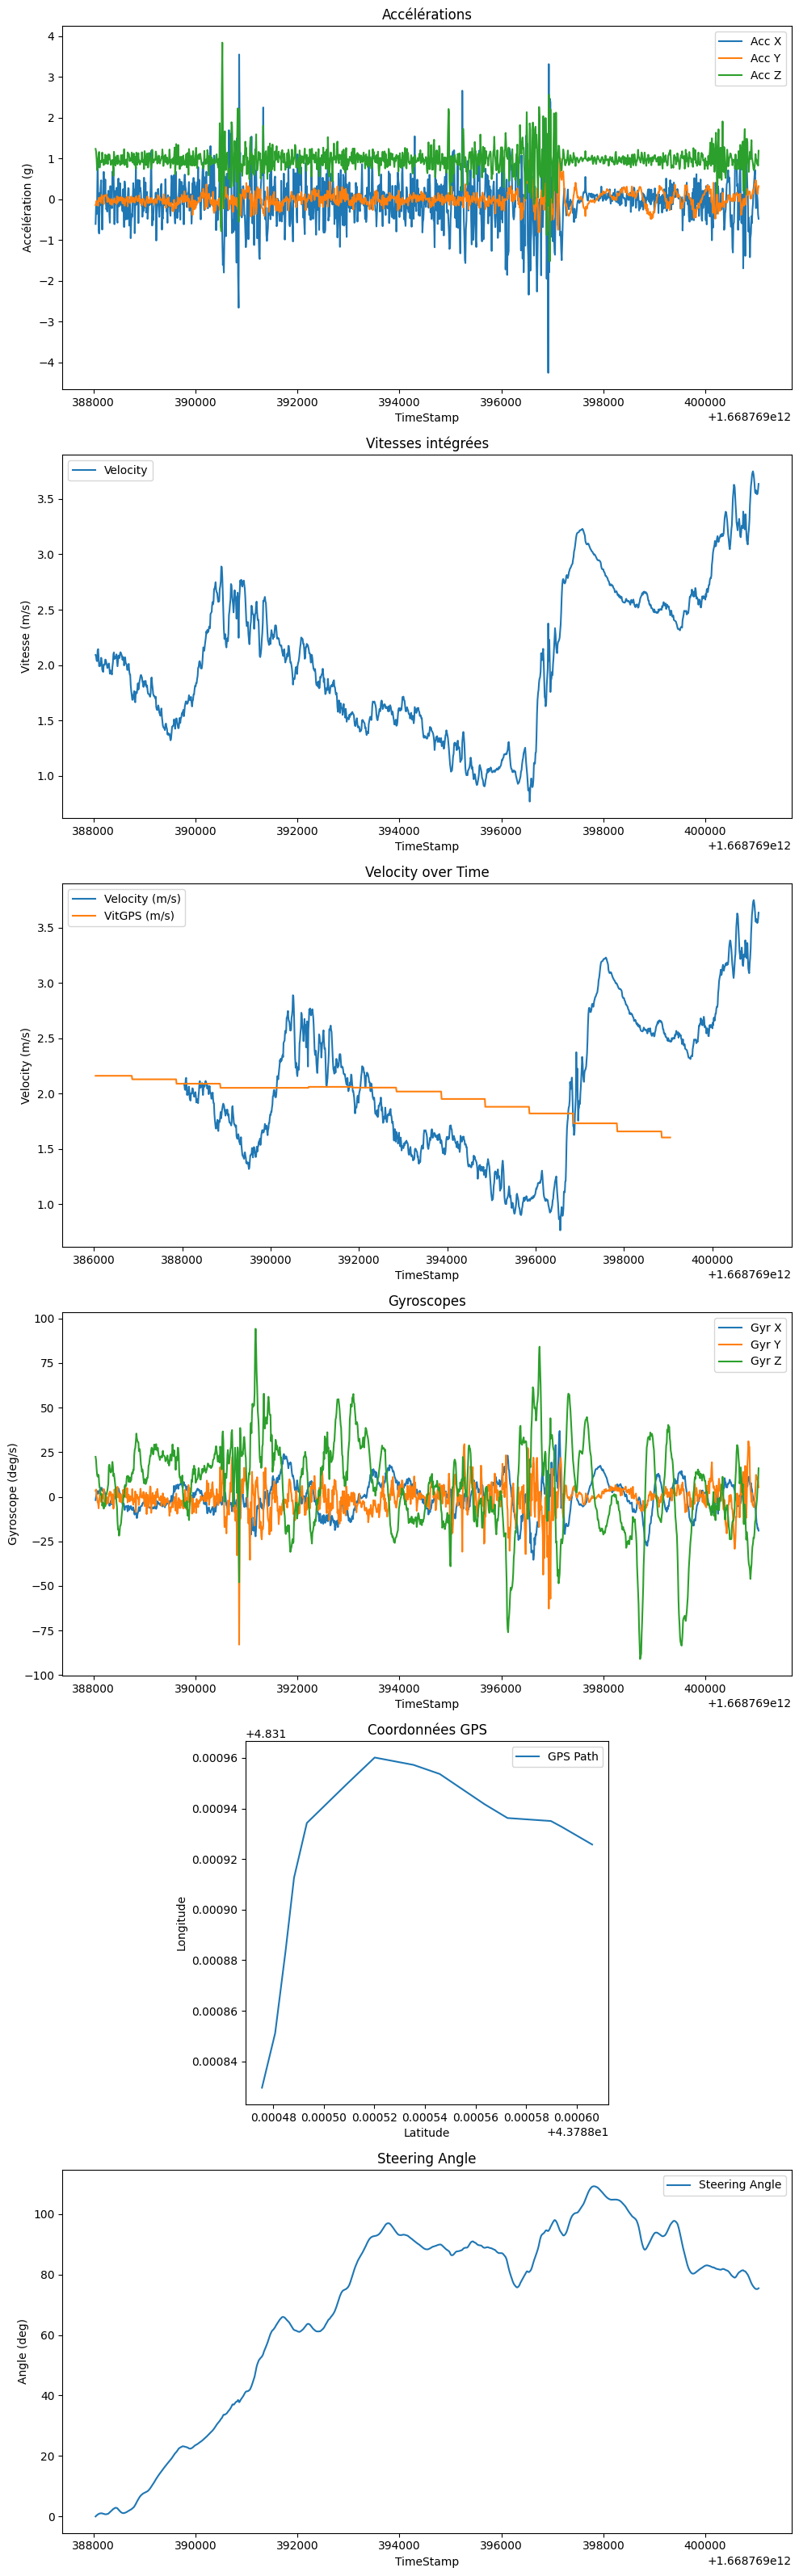

In [72]:


# Calculer la différence de temps entre chaque point de données en secondes
time_diff = np.diff(video2['TimeStamp'], prepend=video2['TimeStamp'].iloc[0]) / 1000.0



# Intégrer les données d'accélération pour obtenir la vitesse
velocity_x = np.cumsum(video2[' AccX(g)']*9.81 * time_diff)+video2[' VitGPS(km/h)'].iloc[200]/3.6
velocity_y = np.cumsum(video2[' AccY(g)']*9.81  * time_diff)
velocity_z = np.cumsum(video2[' AccZ(g)']*9.81  * time_diff)

velocity= np.sqrt(velocity_x**2 + velocity_y**2)

# Intégrer les vitesses pour obtenir les positions
position_x = np.cumsum(velocity_x * time_diff)
position_y = np.cumsum(velocity_y * time_diff)
position_z = np.cumsum(velocity_z * time_diff)

# Intégrer les données du gyroscope pour obtenir l'angle de direction
steering_angle = np.cumsum(video2[' GyrZ(deg/s)'] * time_diff)

# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(6, 1, figsize=(10, 32))

# Plot des accélérations
axs[0].plot(video2['TimeStamp'], video2[' AccX(g)'], label='Acc X')
axs[0].plot(video2['TimeStamp'], video2[' AccY(g)'], label='Acc Y')
axs[0].plot(video2['TimeStamp'], video2[' AccZ(g)'], label='Acc Z')
axs[0].set_title('Accélérations')
axs[0].set_xlabel('TimeStamp')
axs[0].set_ylabel('Accélération (g)')
axs[0].legend()

# Plot des vitesses intégrées
axs[1].plot(video2['TimeStamp'], velocity, label='Velocity')
axs[1].set_title('Vitesses intégrées')
axs[1].set_xlabel('TimeStamp')
axs[1].set_ylabel('Vitesse (m/s)')
axs[1].legend()

# Décaler les timestamps de la vitesse GPS de deux secondes
gps_time_shifted = video2['TimeStamp'] - 2000 # Décalage de 2000 ms (2 secondes)

# Décaler les timestamps de la vitesse GPS de deux secondes

# Tracer la vitesse GPS et la vitesse calculée
axs[2].plot(video2['TimeStamp'], velocity, label='Velocity (m/s)')
axs[2].plot(gps_time_shifted, video2[' VitGPS(km/h)'] / 3.6, label='VitGPS (m/s)')  # Conversion de km/h en m/s
axs[2].set_title('Velocity over Time')
axs[2].set_xlabel('TimeStamp')
axs[2].set_ylabel('Velocity (m/s)')
axs[2].legend()
# Plot des gyroscopes
axs[3].plot(video2['TimeStamp'], video2[' GyrX(deg/s)'], label='Gyr X')
axs[3].plot(video2['TimeStamp'], video2[' GyrY(deg/s)'], label='Gyr Y')
axs[3].plot(video2['TimeStamp'], video2[' GyrZ(deg/s)'], label='Gyr Z')
axs[3].set_title('Gyroscopes')
axs[3].set_xlabel('TimeStamp')
axs[3].set_ylabel('Gyroscope (deg/s)')
axs[3].legend()

# Plot des coordonnées GPS
axs[4].plot(video2[' Lat'], video2[' Long'], label='GPS Path')
axs[4].set_title('Coordonnées GPS')
axs[4].set_xlabel('Latitude')
axs[4].set_ylabel('Longitude')
axs[4].legend()
axs[4].set_aspect('equal', 'box')


# Plot de l'angle de direction
axs[5].plot(video2['TimeStamp'], steering_angle, label='Steering Angle')
axs[5].set_title('Steering Angle')
axs[5].set_xlabel('TimeStamp')
axs[5].set_ylabel('Angle (deg)')
axs[5].legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

In [22]:
video3=pd.read_csv('examples_interactions_pietons/velo2.csv', sep=';')


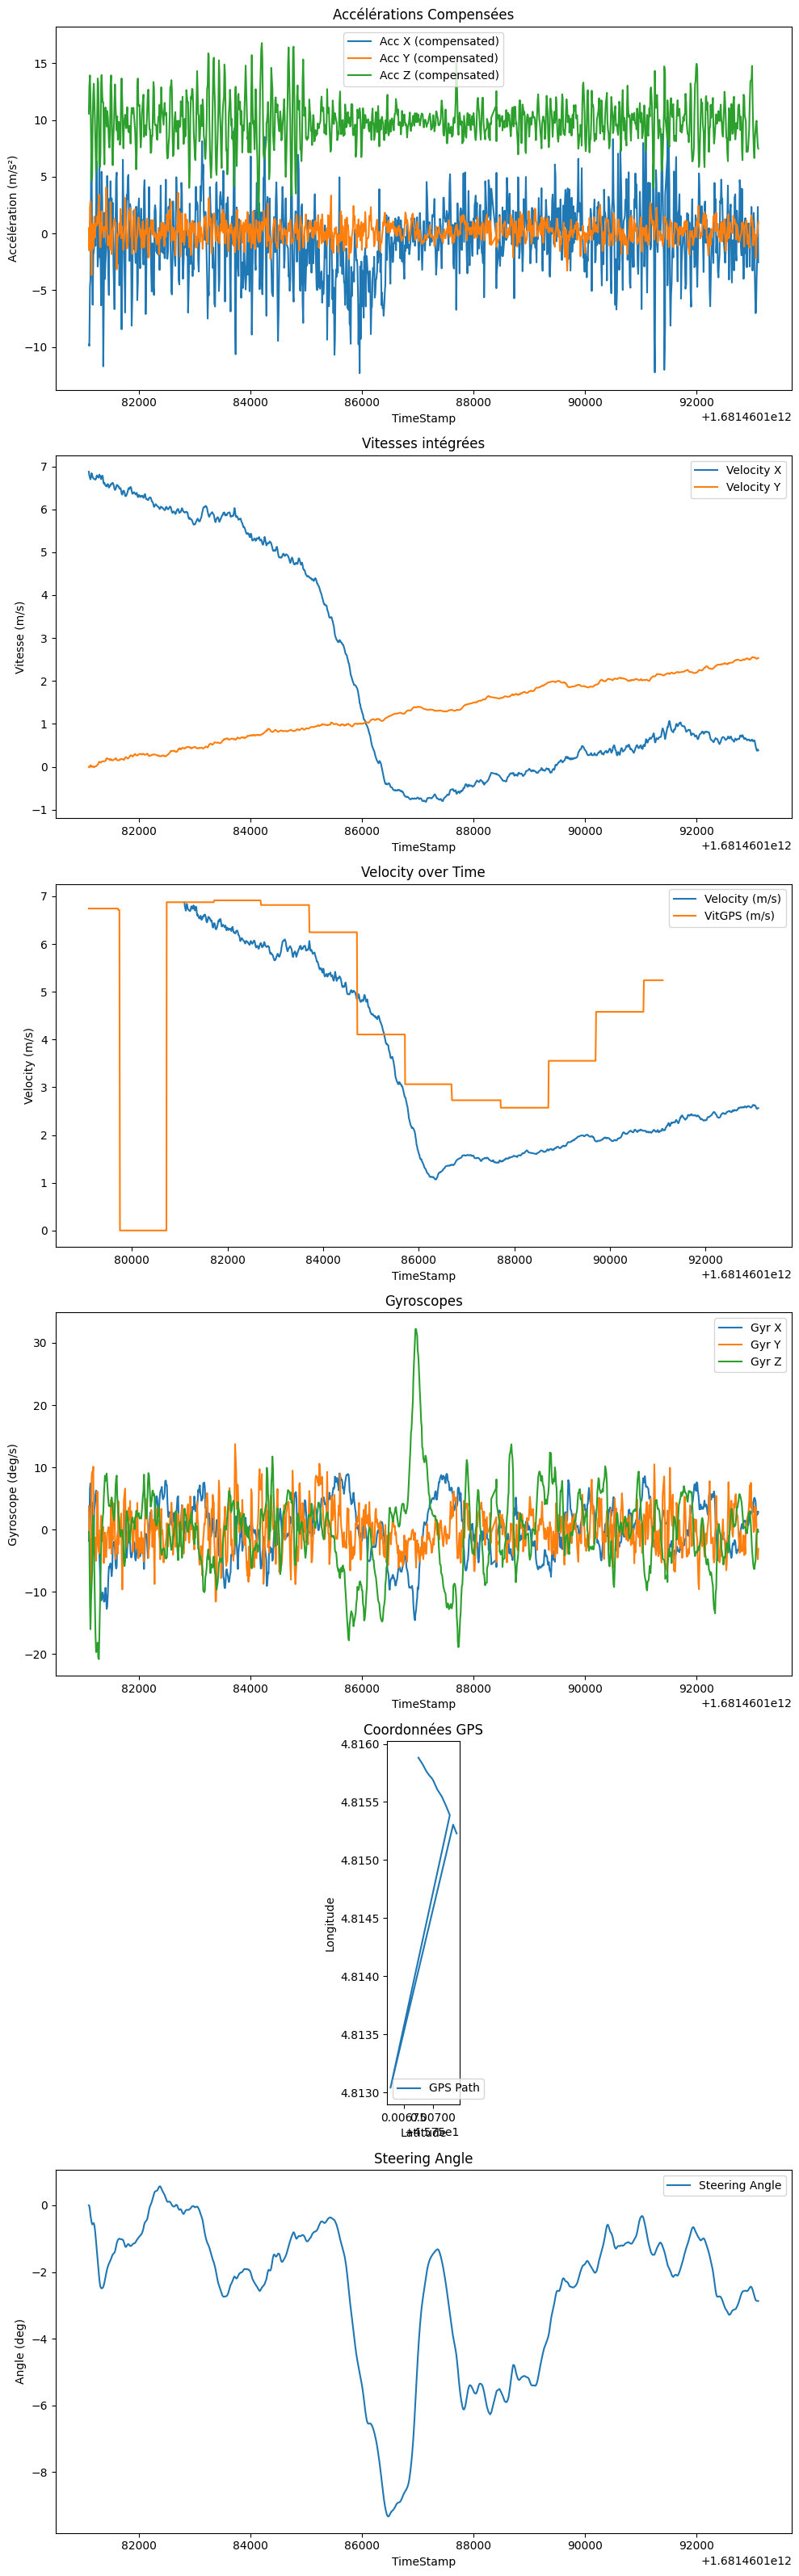

In [67]:

# Compensez les effets de la gravité sur les mesures d'accélération
acc_x = (video3[' AccX(g)'] * 9.81 ) 
acc_y = (video3[' AccY(g)'] * 9.81 ) 
acc_z = (video3[' AccZ(g)'] * 9.81 )

# Intégrer les données d'accélération pour obtenir la vitesse
velocity_x = np.cumsum(acc_x * time_diff) + video3[' VitGPS(km/h)'].iloc[200] / 3.6
velocity_y = np.cumsum(acc_y * time_diff) 
velocity_z = np.cumsum(acc_z * time_diff)


# Calculer la vitesse scalaire
velocity = np.sqrt(velocity_x**2 + velocity_y**2)

# Intégrer les vitesses pour obtenir les positions
position_x = np.cumsum(velocity_x * time_diff)
position_y = np.cumsum(velocity_y * time_diff)
position_z = np.cumsum(velocity_z * time_diff)

# Intégrer les données du gyroscope pour obtenir l'angle de direction
steering_angle = np.cumsum(video3[' GyrZ(deg/s)'] * time_diff)

# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(6, 1, figsize=(10, 32))

# Plot des accélérations compensées
axs[0].plot(video3['TimeStamp'], acc_x, label='Acc X (compensated)')
axs[0].plot(video3['TimeStamp'], acc_y, label='Acc Y (compensated)')
axs[0].plot(video3['TimeStamp'], acc_z, label='Acc Z (compensated)')
axs[0].set_title('Accélérations Compensées')
axs[0].set_xlabel('TimeStamp')
axs[0].set_ylabel('Accélération (m/s²)')
axs[0].legend()

# Plot des vitesses intégrées
axs[1].plot(video3['TimeStamp'], velocity_x, label='Velocity X')
axs[1].plot(video3['TimeStamp'], velocity_y, label='Velocity Y')
axs[1].set_title('Vitesses intégrées')
axs[1].set_xlabel('TimeStamp')
axs[1].set_ylabel('Vitesse (m/s)')
axs[1].legend()

# Décaler les timestamps de la vitesse GPS de deux secondes
gps_time_shifted = video3['TimeStamp'] - 2000  # Décalage de 2000 ms (2 secondes)

# Tracer la vitesse GPS et la vitesse calculée
axs[2].plot(video3['TimeStamp'], velocity, label='Velocity (m/s)')
axs[2].plot(gps_time_shifted, video3[' VitGPS(km/h)'] / 3.6, label='VitGPS (m/s)')  # Conversion de km/h en m/s
axs[2].set_title('Velocity over Time')
axs[2].set_xlabel('TimeStamp')
axs[2].set_ylabel('Velocity (m/s)')
axs[2].legend()

# Plot des gyroscopes
axs[3].plot(video3['TimeStamp'], video3[' GyrX(deg/s)'], label='Gyr X')
axs[3].plot(video3['TimeStamp'], video3[' GyrY(deg/s)'], label='Gyr Y')
axs[3].plot(video3['TimeStamp'], video3[' GyrZ(deg/s)'], label='Gyr Z')
axs[3].set_title('Gyroscopes')
axs[3].set_xlabel('TimeStamp')
axs[3].set_ylabel('Gyroscope (deg/s)')
axs[3].legend()

# Plot des coordonnées GPS
axs[4].plot(video3[' Lat'], video3[' Long'], label='GPS Path')
axs[4].set_title('Coordonnées GPS')
axs[4].set_xlabel('Latitude')
axs[4].set_ylabel('Longitude')
axs[4].legend()
axs[4].set_aspect('equal', 'box')


# Plot de l'angle de direction
axs[5].plot(video3['TimeStamp'], steering_angle, label='Steering Angle')
axs[5].set_title('Steering Angle')
axs[5].set_xlabel('TimeStamp')
axs[5].set_ylabel('Angle (deg)')
axs[5].legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

In [73]:
# Charger les données avec des noms de fichiers simplifiés
trot1 = pd.read_csv('examples_interactions_pietons/trot1.csv', sep=';').dropna()
trot2 = pd.read_csv('examples_interactions_pietons/trot2.csv', sep=';').dropna()
trot3 = pd.read_csv('examples_interactions_pietons/trot3.csv', sep=';').dropna()
velo1 = pd.read_csv('examples_interactions_pietons/velo1.csv', sep=';').dropna()
velo2 = pd.read_csv('examples_interactions_pietons/velo2.csv', sep=';').dropna()
velo3 = pd.read_csv('examples_interactions_pietons/velo3.csv', sep=';').dropna()

videos = [trot1, trot2, trot3, velo1, velo2, velo3]
video_names = ['trot1', 'trot2', 'trot3', 'velo1', 'velo2', 'velo3']

# Fonction pour retirer les deux dernières secondes
def remove_last_two_seconds(df):
    max_timestamp = df['TimeStamp'].max()
    cutoff_timestamp = max_timestamp - 2000  # Retirer les deux dernières secondes (2000 ms)
    return df[df['TimeStamp'] <= cutoff_timestamp]

# Appliquer la fonction à chaque DataFrame
videos = [remove_last_two_seconds(video) for video in videos]



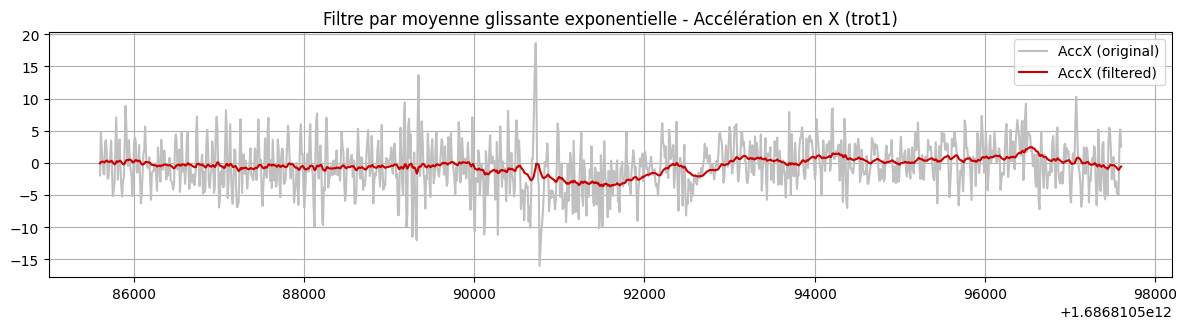

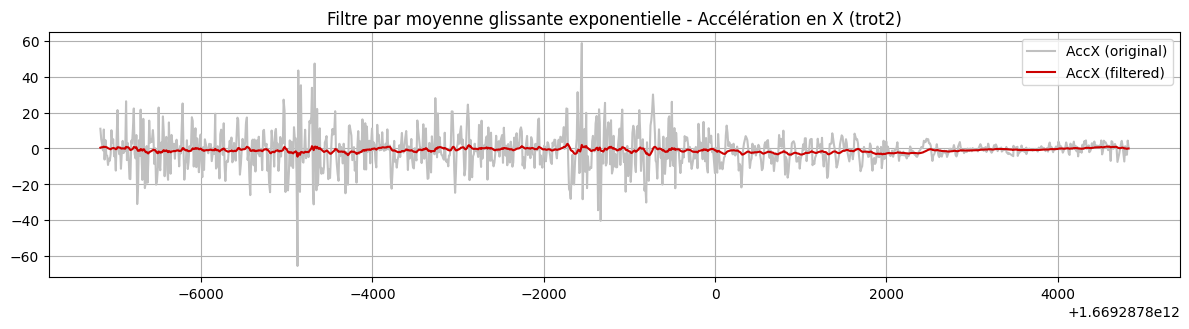

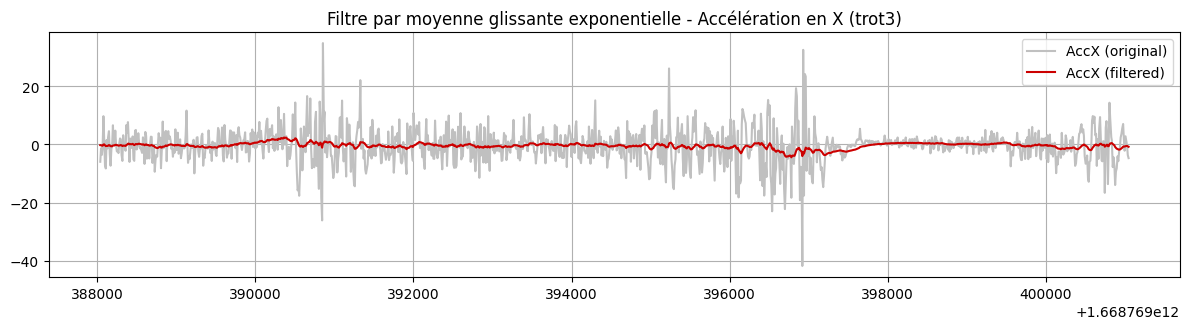

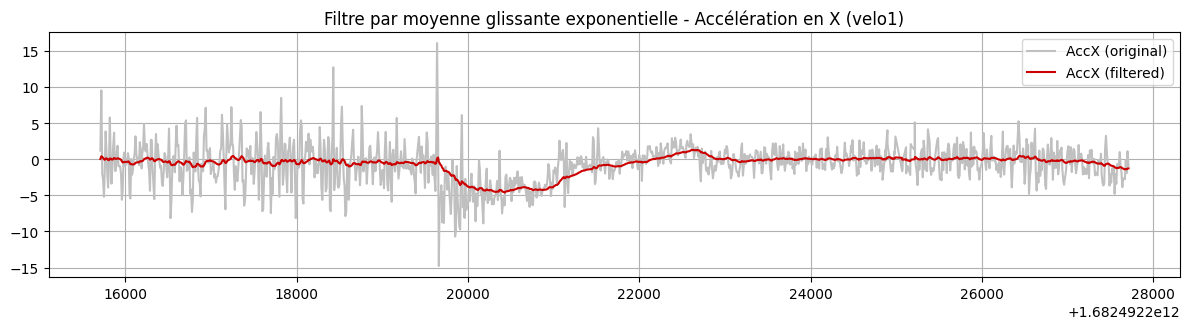

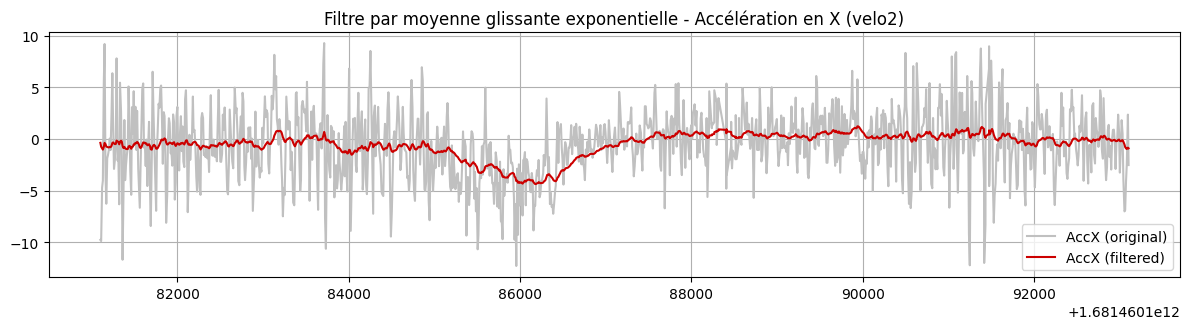

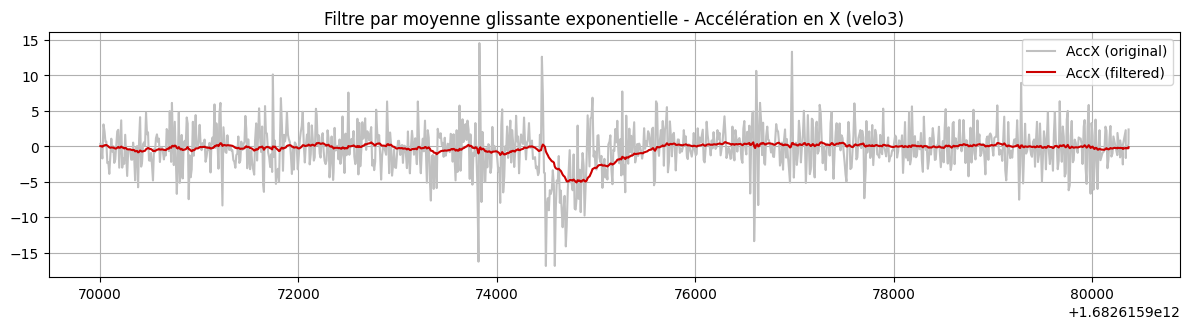

In [74]:

# Constante du système
N = 50
alpha = 2 / (N + 1)

# Fonction pour appliquer le filtre par moyenne glissante exponentielle
def exponential_moving_average(signal, alpha):
    s_m = [0]
    for e in signal:
        s_m.append(alpha * e + (1 - alpha) * s_m[-1])
    return s_m[1:]  # Exclure le premier élément initialisé à 0

# Liste des DataFrames
videos = [trot1, trot2, trot3, velo1, velo2, velo3]
video_names = ['trot1', 'trot2', 'trot3', 'velo1', 'velo2', 'velo3']

# Tracer les résultats pour chaque vidéo
for video, name in zip(videos, video_names):
    acc_x = video[' AccX(g)'] * 9.81
    acc_y = video[' AccY(g)'] * 9.81

    # Appliquer le filtre aux données d'accélération en x et en y
    acc_x_filtered = exponential_moving_average(acc_x, alpha)
    acc_y_filtered = exponential_moving_average(acc_y, alpha)

    # Tracer les résultats
    plt.figure(figsize=(12, 6))

    # Tracer l'accélération en x
    plt.subplot(2, 1, 1)
    plt.plot(video['TimeStamp'], acc_x, color='silver', label='AccX (original)')
    plt.plot(video['TimeStamp'], acc_x_filtered, color='#cc0000', label='AccX (filtered)')
    plt.grid(True, which='both')
    plt.legend(loc="best")
    plt.title(f"Filtre par moyenne glissante exponentielle - Accélération en X ({name})")

    plt.tight_layout()
    plt.show()

In [75]:
videos = [trot1, trot2, trot3, velo1, velo2, velo3]
video_names = ['trot1', 'trot2', 'trot3', 'velo1', 'velo2', 'velo3']

# Dictionnaire pour stocker les résultats
results = {}

# Calculer les valeurs minimales, maximales et moyennes de l'accélération totale pour chaque vidéo
for video, name in zip(videos, video_names):
    # Appliquer le filtre passe-bas aux données d'accélération
    acc_x_filtered = exponential_moving_average(video[' AccX(g)'], alpha)
    acc_y_filtered = exponential_moving_average(video[' AccY(g)'], alpha)

    # Convertir les données filtrées en numpy array
    acc_x_filtered = np.array(acc_x_filtered)
    acc_y_filtered = np.array(acc_y_filtered)

    # Compensez les effets de la gravité sur les mesures d'accélération
    acc_x = acc_x_filtered * 9.81
    acc_y = acc_y_filtered * 9.81



    # Calculer les valeurs minimales, maximales et moyennes de l'accélération totale
    min_acc = np.min(acc_x)
    max_acc = np.max(acc_x)
    mean_acc = np.mean(acc_x)

    # Stocker les résultats
    results[name] = {'min_acc': min_acc, 'max_acc': max_acc}

# Afficher les résultats
for name, stats in results.items():
    print(f"Video: {name}")
    print(f"  Décélération maximale: {stats['min_acc']} m/s²")
    print(f"  Accélération maximale: {stats['max_acc']} m/s²")



Video: trot1
  Décélération maximale: -3.66838350630037 m/s²
  Accélération maximale: 2.4547863008729873 m/s²
Video: trot2
  Décélération maximale: -4.587206579653759 m/s²
  Accélération maximale: 2.5835828260286093 m/s²
Video: trot3
  Décélération maximale: -4.421188925612826 m/s²
  Accélération maximale: 2.38661922685211 m/s²
Video: velo1
  Décélération maximale: -4.604825329696429 m/s²
  Accélération maximale: 1.3083930945068978 m/s²
Video: velo2
  Décélération maximale: -4.375134200877882 m/s²
  Accélération maximale: 1.214696413173618 m/s²
Video: velo3
  Décélération maximale: -5.112963144955088 m/s²
  Accélération maximale: 0.5791082857345919 m/s²


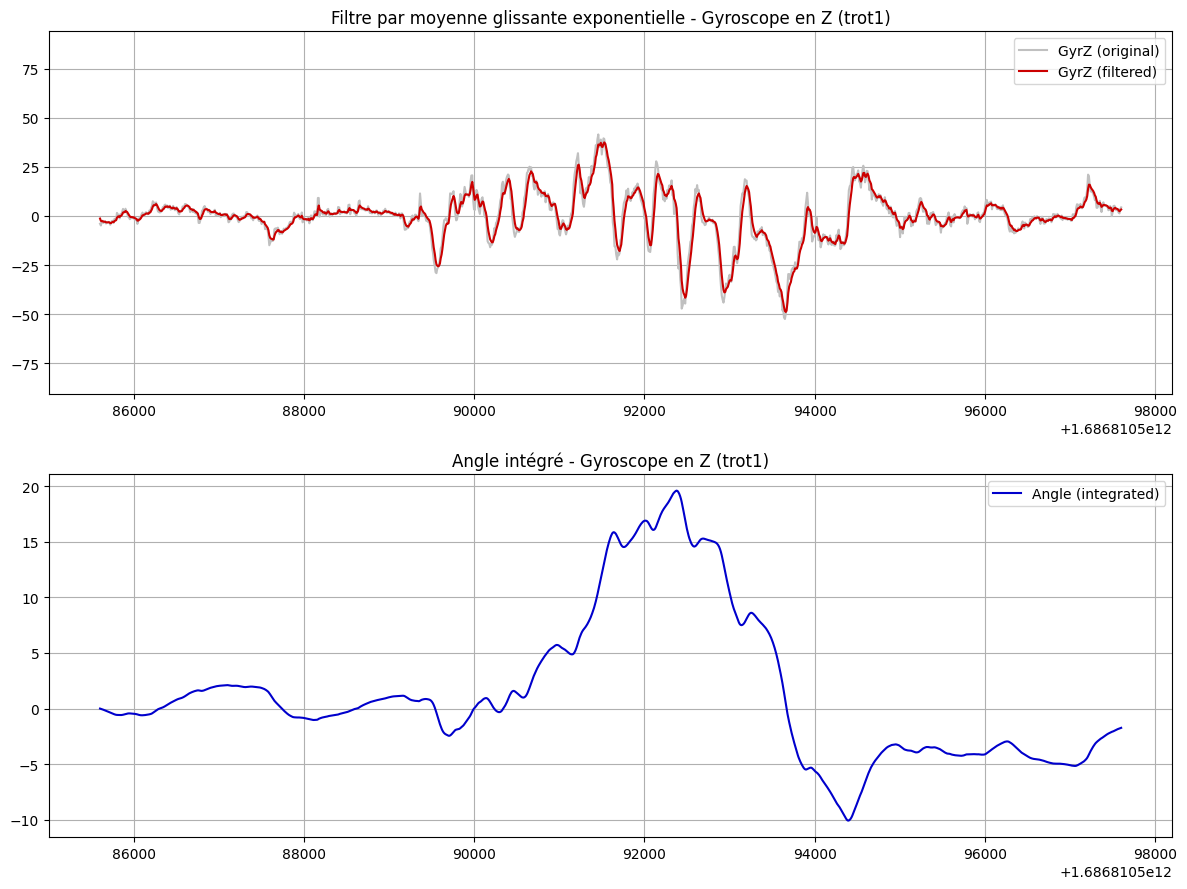

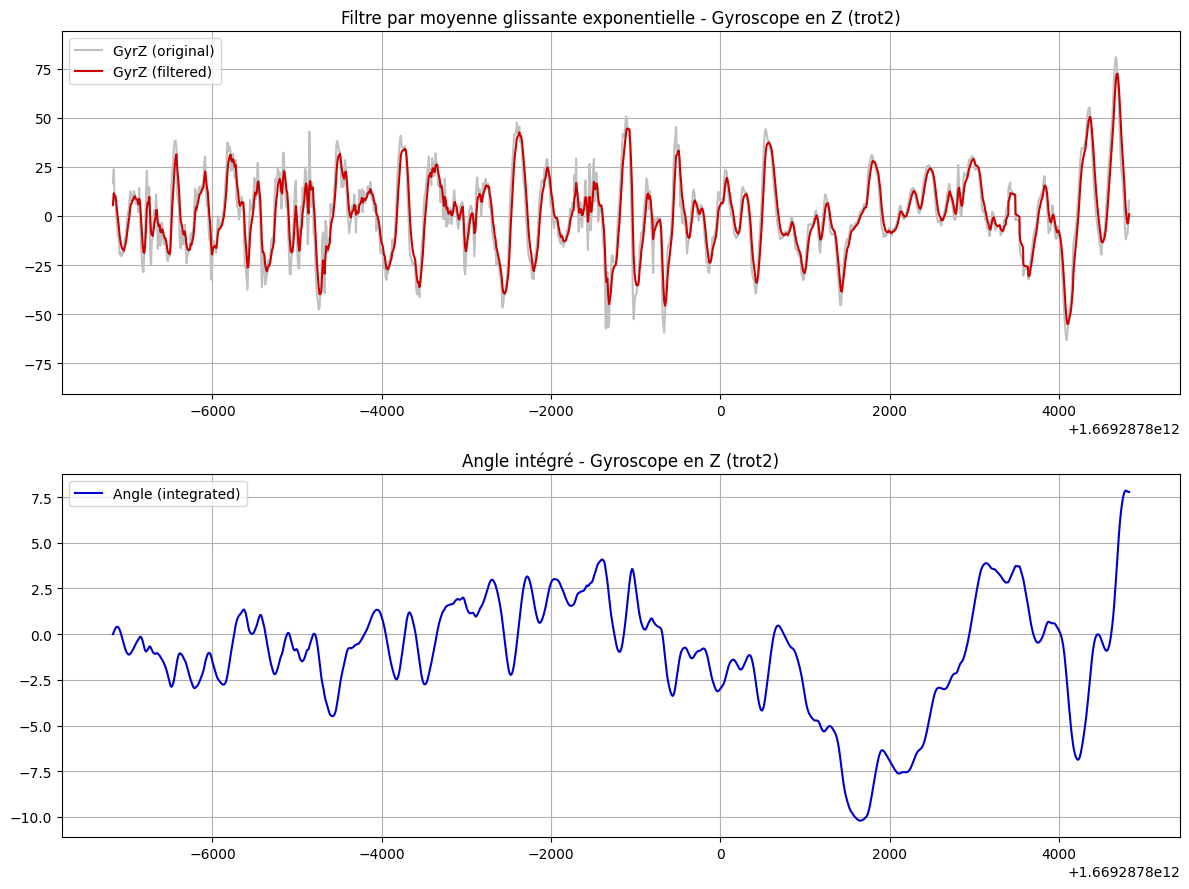

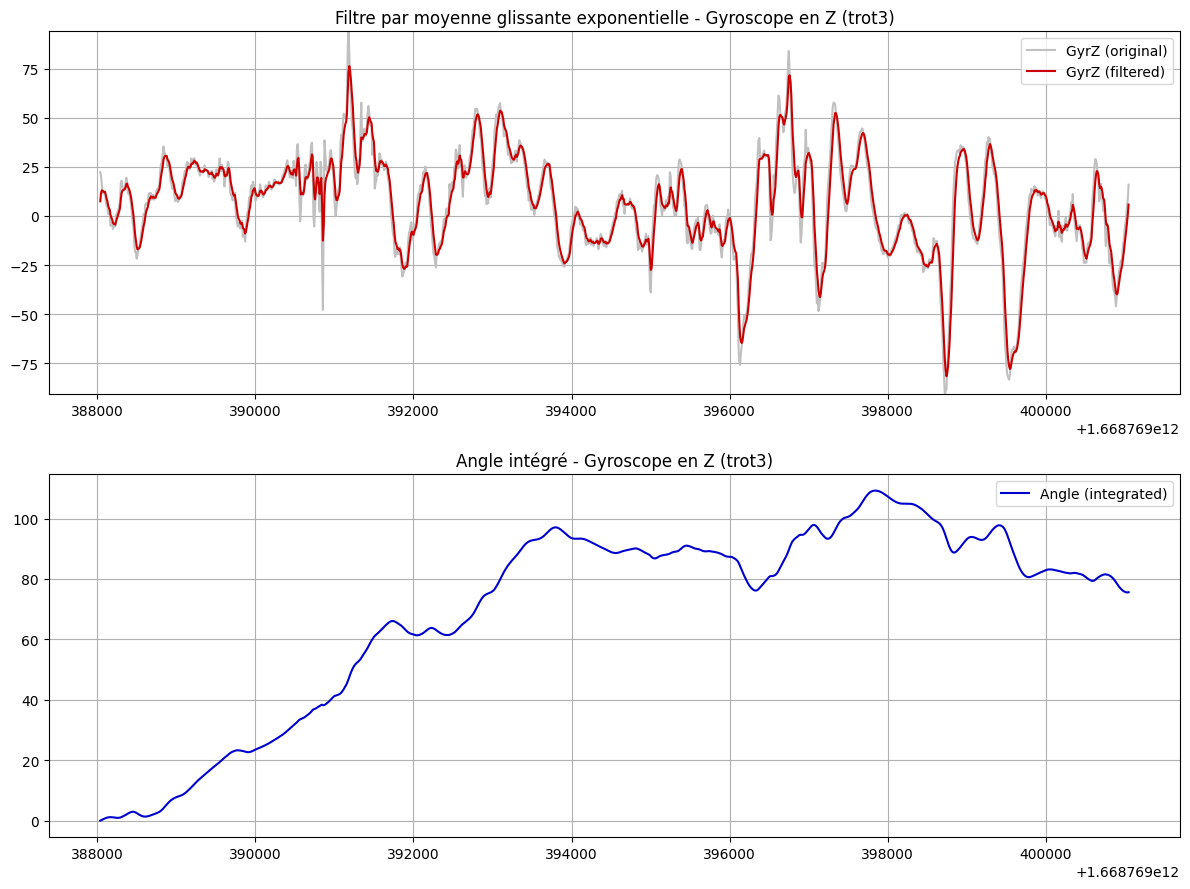

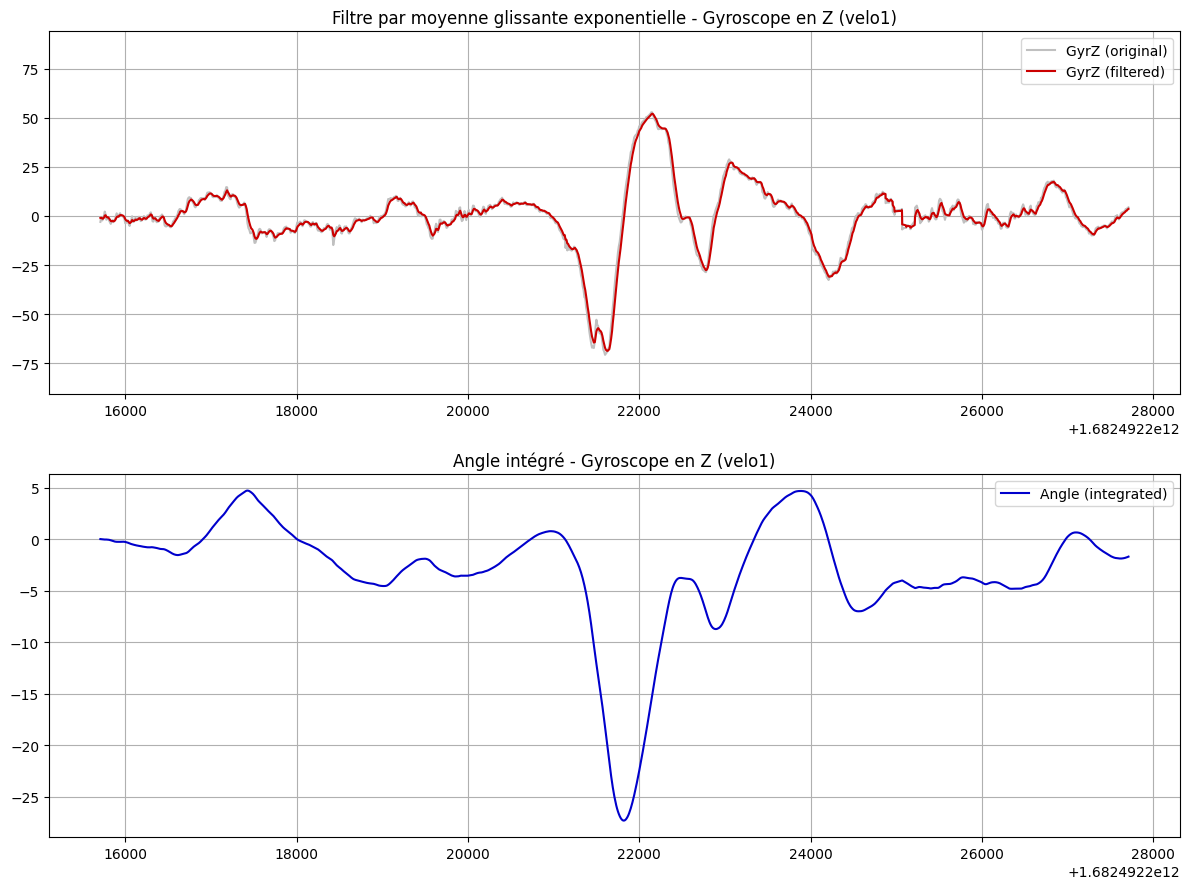

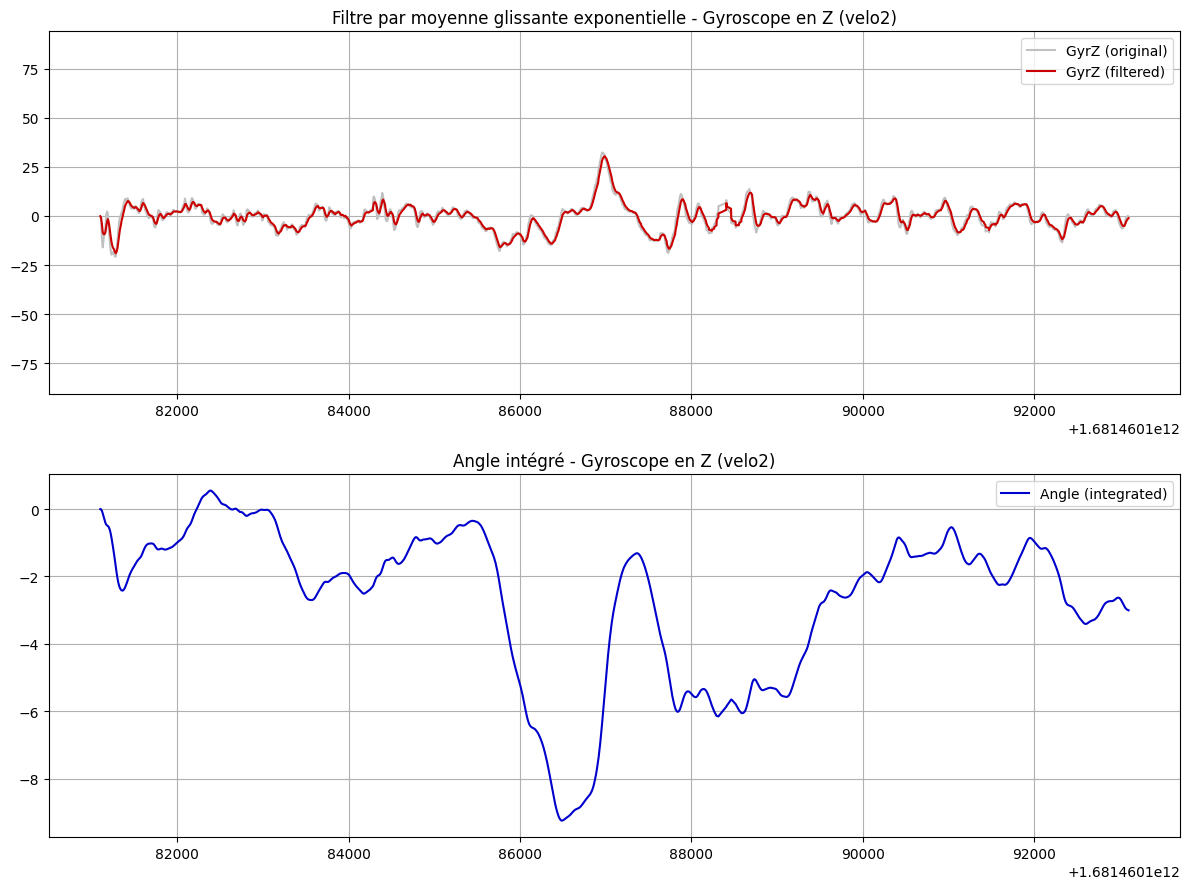

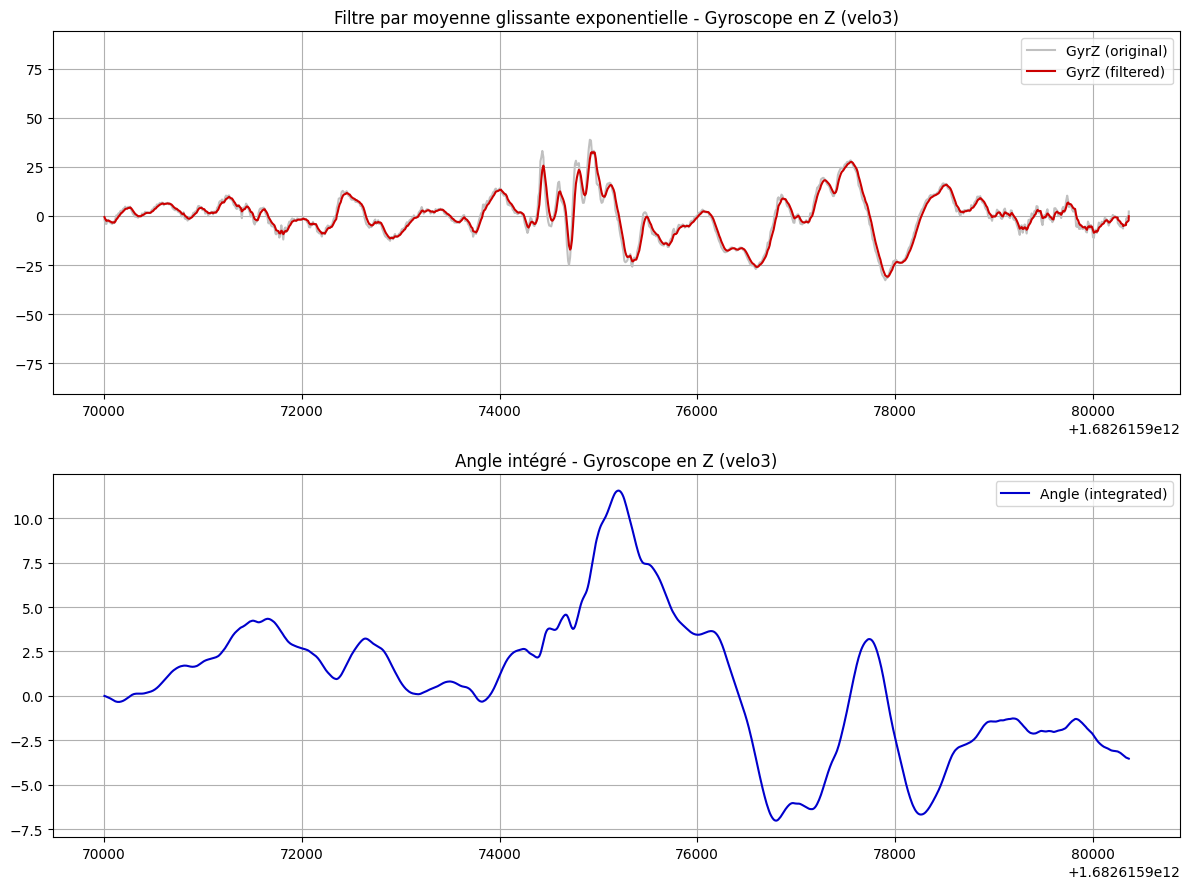

In [51]:
# Liste des DataFrames
videos = [trot1, trot2, trot3, velo1, velo2, velo3]
video_names = ['trot1', 'trot2', 'trot3', 'velo1', 'velo2', 'velo3']

# Constante du système
N = 50
alpha = 2 / (N + 1)

# Fonction pour appliquer le filtre par moyenne glissante exponentielle
def exponential_moving_average(signal, alpha):
    s_m = [0]
    for e in signal:
        s_m.append(alpha * e + (1 - alpha) * s_m[-1])
    return s_m[1:]  # Exclure le premier élément initialisé à 0

# Déterminer les valeurs minimales et maximales des données de gyroscope pour toutes les vidéos
all_gyr_z = np.concatenate([video[' GyrZ(deg/s)'] for video in videos])
min_gyr_z = np.min(all_gyr_z)
max_gyr_z = np.max(all_gyr_z)

# Tracer les résultats pour chaque vidéo
for video, name in zip(videos, video_names):
    gyr_z = video[' GyrZ(deg/s)']

    # Appliquer le filtre aux données du gyroscope en z
    gyr_z_filtered = exponential_moving_average(gyr_z, alpha)

    # Calculer l'angle en intégrant les données du gyroscope
    time_diff = np.diff(video['TimeStamp'], prepend=video['TimeStamp'].iloc[0]) / 1000.0  # Convertir en secondes
    angle = np.cumsum(gyr_z_filtered * time_diff)

    # Tracer les résultats
    plt.figure(figsize=(12, 9))

    # Tracer le gyroscope en z
    plt.subplot(2, 1, 1)
    plt.plot(video['TimeStamp'], gyr_z, color='silver', label='GyrZ (original)')
    plt.plot(video['TimeStamp'], gyr_z_filtered, color='#cc0000', label='GyrZ (filtered)')
    plt.ylim(min_gyr_z, max_gyr_z)  # Mettre à la même échelle
    plt.grid(True, which='both')
    plt.legend(loc="best")
    plt.title(f"Filtre par moyenne glissante exponentielle - Gyroscope en Z ({name})")

    # Tracer l'angle
    plt.subplot(2, 1, 2)
    plt.plot(video['TimeStamp'], angle, color='#0000cc', label='Angle (integrated)')
    plt.grid(True, which='both')
    plt.legend(loc="best")
    plt.title(f"Angle intégré - Gyroscope en Z ({name})")

    plt.tight_layout()
    plt.show()

In [29]:
# Tracer les résultats pour chaque vidéo
for video, name in zip(videos, video_names):
    gyr_z = video[' GyrZ(deg/s)']

    # Appliquer le filtre aux données du gyroscope en z
    gyr_z_filtered = exponential_moving_average(gyr_z, alpha)

    # Calculer les valeurs minimales et maximales des vitesses angulaires filtrées
    min_gyr_z = np.min(gyr_z_filtered)
    max_gyr_z = np.max(gyr_z_filtered)

    # Stocker les résultats
    results[name] = {'min_gyr_z': min_gyr_z, 'max_gyr_z': max_gyr_z}



# Afficher les résultats
for name, stats in results.items():
    print(f"Video: {name}")
    print(f"  Vitesse angulaire minimale (GyrZ): {stats['min_gyr_z']} deg/s")
    print(f"  Vitesse angulaire maximale (GyrZ): {stats['max_gyr_z']} deg/s")
    print()

Video: trot1
  Vitesse angulaire minimale (GyrZ): -32.5031653917394 deg/s
  Vitesse angulaire maximale (GyrZ): 27.96692927510028 deg/s

Video: trot2
  Vitesse angulaire minimale (GyrZ): -29.604866230518237 deg/s
  Vitesse angulaire maximale (GyrZ): 37.66783724017284 deg/s

Video: trot3
  Vitesse angulaire minimale (GyrZ): -48.677860695414324 deg/s
  Vitesse angulaire maximale (GyrZ): 45.56568989889762 deg/s

Video: velo1
  Vitesse angulaire minimale (GyrZ): -57.794929962284655 deg/s
  Vitesse angulaire maximale (GyrZ): 42.683993325024936 deg/s

Video: velo2
  Vitesse angulaire minimale (GyrZ): -11.614679825725 deg/s
  Vitesse angulaire maximale (GyrZ): 19.158439661768256 deg/s

Video: velo3
  Vitesse angulaire minimale (GyrZ): -21.36645490080171 deg/s
  Vitesse angulaire maximale (GyrZ): 21.5885031326598 deg/s



/var/folders/y0/0nrj3m412p978185q3d2503sr02q24/T/ipykernel_30744/265296150.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([results['velo']['max_angle'], results['trot']['max_angle']], labels=['Vélo', 'Trottinette'])
/var/folders/y0/0nrj3m412p978185q3d2503sr02q24/T/ipykernel_30744/265296150.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([results['velo']['max_gyr_z'], results['trot']['max_gyr_z']], labels=['Vélo', 'Trottinette'])


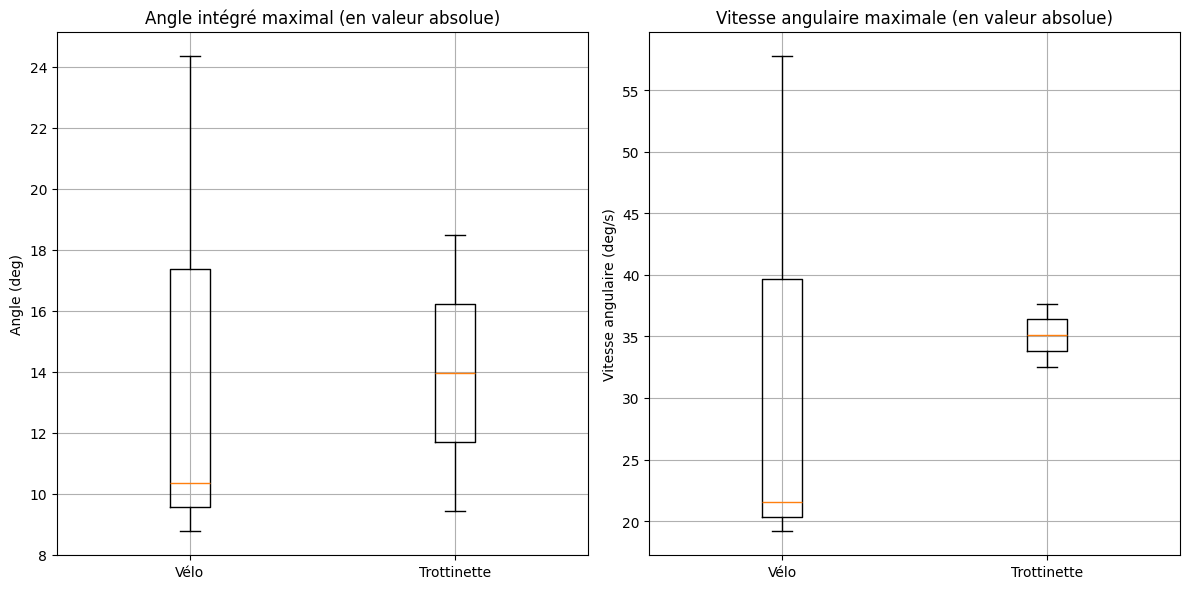

In [59]:

# Liste des DataFrames
videos = [velo1, velo2, velo3, trot1, trot2]
video_names = ['velo1', 'velo2', 'velo3', 'trot1', 'trot2']

# Constante du système
N = 30
alpha = 2 / (N + 1)

# Fonction pour appliquer le filtre par moyenne glissante exponentielle
def exponential_moving_average(signal, alpha):
    s_m = [0]
    for e in signal:
        s_m.append(alpha * e + (1 - alpha) * s_m[-1])
    return s_m[1:]  # Exclure le premier élément initialisé à 0

# Dictionnaire pour stocker les résultats
results = {'velo': {'max_gyr_z': [], 'max_angle': []},
           'trot': {'max_gyr_z': [], 'max_angle': []}}

# Calculer les valeurs maximales de vitesse angulaire et d'angle intégré pour chaque vidéo
for video, name in zip(videos, video_names):
    gyr_z = video[' GyrZ(deg/s)']

    # Appliquer le filtre aux données du gyroscope en z
    gyr_z_filtered = exponential_moving_average(gyr_z, alpha)

    # Calculer l'angle en intégrant les données du gyroscope
    time_diff = np.diff(video['TimeStamp'], prepend=video['TimeStamp'].iloc[0]) / 1000.0  # Convertir en secondes
    angle = np.cumsum(gyr_z_filtered * time_diff)

    # Calculer les valeurs maximales en valeur absolue
    max_gyr_z = np.max(np.abs(gyr_z_filtered))
    max_angle = np.max(np.abs(angle))

    # Stocker les résultats
    if 'velo' in name:
        results['velo']['max_gyr_z'].append(max_gyr_z)
        results['velo']['max_angle'].append(max_angle)
    else:
        results['trot']['max_gyr_z'].append(max_gyr_z)
        results['trot']['max_angle'].append(max_angle)

# Tracer les résultats sous forme de boxplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Tracer les angles intégrés maximaux
axs[0].boxplot([results['velo']['max_angle'], results['trot']['max_angle']], labels=['Vélo', 'Trottinette'])
axs[0].set_title('Angle intégré maximal (en valeur absolue)')
axs[0].set_ylabel('Angle (deg)')
axs[0].grid(True)

# Tracer les vitesses angulaires maximales
axs[1].boxplot([results['velo']['max_gyr_z'], results['trot']['max_gyr_z']], labels=['Vélo', 'Trottinette'])
axs[1].set_title('Vitesse angulaire maximale (en valeur absolue)')
axs[1].set_ylabel('Vitesse angulaire (deg/s)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [37]:
from shapely.geometry import LineString

In [39]:
for video, name in zip(videos, video_names):
    # Convertir les colonnes 'Long' et 'Lat' en numérique et supprimer les valeurs NaN
    video['Long'] = pd.to_numeric(video[' Long'], errors='coerce')
    video['Lat'] = pd.to_numeric(video[' Lat'], errors='coerce')
    video = video.dropna(subset=[' Long', ' Lat'])

    # Créer une LineString à partir des points de latitude et de longitude
    line = LineString(zip(video[' Long'], video[' Lat']))

    # Créer une GeoDataFrame avec la LineString
    geo_df = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[line])

    # Enregistrer la GeoDataFrame en tant que fichier GeoJSON
    geo_df.to_file(f'{name}_trajectory.geojson', driver='GeoJSON')